# Implementing Machine Learning Regression Algorithms

In [1]:
# Import libraries and perform basic filtering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV

from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GroupShuffleSplit, ShuffleSplit, StratifiedShuffleSplit, GridSearchCV, GroupKFold
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, \
AdaBoostRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectFromModel, f_regression, SelectKBest
from sklearn.model_selection import learning_curve, StratifiedKFold, KFold

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict

pd.set_option('display.max_columns', None)

df = pd.DataFrame.from_csv('data.csv').set_index(['Name', 'Season']).reset_index()
df = df.loc[df['MIN'] >= 100]
df = df.loc[df['Drafted'] != 2016]
df['Valid'] = df['Drafted'] - df['Season']
df = df.loc[df['Valid'] >= 0]
df.replace(np.inf, np.nan, inplace=True)
print len(df)
print len(df.columns)
df.head()

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


2523
109


,Name,Season,FG% 2pt Jumpers,Max_Vert,NS_Vert,IS_Score,P_Score,D_Score,OS_Score,%assisted at rim,3PA,FGA,FGM,WtHr,HtPosHt,FG%,FG% at rim,Height,WHr,%of shots 3pt,3P%,PTS,0,FT%,%assisted 3s,3PM,FTr,FGatRim,FTA,% shots 2pt J,%assisted 2pt J,TOV,FTM,% shots at rim,PF,STL,2ptJUnAssisted,3ptJUnAssisted,RimUnAssisted,TRB,Weight,Agility,DEF,2ptJ,Stocks,RSB,RSB2,OFF,ATr,Speed,BLK,AST,Stocks2,2P%,2PA,2PM,3PAr,AST%,A_Score,Age,Ast/TO,Athleticism,BLK%,Born,DRB%,DRtg,DWS,Drafted,Drafted_x,Drafted_y,FT/FGA,FTA/FGA,GP,League,MIN,ORB%,ORtg,OWS,PER,PPM,PPR,PPS,Pick,Pick_x,Pick_y,PosHeight,Position,STL%,TOV%,TRB%,TS,TS%,USG%,Url,WS,WSPredict,WSTOT,Wingspan,eFG,eFG%,Vert_adj,Move_adj,OS,IS,D,P,IS2,OS2,Valid
4,A.J. Price,2007.0,NaN,31.0,26.0,10.247271,3.790970,1.751379,2.732442,NaN,4.231316,14.464706,4.968160,0.468085,1.006443,0.204570,NaN,2577.726130,1.035351,NaN,0.109349,49.823063,NaN,0.328509,NaN,0.991531,0.337637,NaN,4.613243,NaN,NaN,2.337487,1.529453,NaN,1.819128,1.401573,NaN,NaN,NaN,2.292789,9.380832,1.794436,1.841145,NaN,1.438955,2.706930,1.047152,1.237424,1.269680,2.205613,0.570841,1.590088,0.675807,0.398620,9.936978,3.848413,0.296459,31.87,6.098541,20.233562,1.79,NaN,0.26,1986.766438,8.12,94.0,1.60,2009.0,2009.0,2009.0,0.39,NaN,NaN,NaN,371.5,4.75,104.2,1.23,16.65,1.752546,1.61,1.14,52.0,52.0,52.0,186.796486,NaN,2.89,17.19,6.45,0.425731,0.479,23.23,http://basketball.realgm.com/player/AJ-Price/S...,NaN,1.660,4.722121,192.405,0.382523,0.434,806.00,3.95783,1.874401,9.419132,1.784823,3.347142,9.419132,1.874401,2.0
5,A.J. Price,2008.0,NaN,31.0,26.0,10.247271,3.790970,1.751379,2.732442,NaN,4.739364,14.456359,5.612916,0.468085,1.006443,0.245469,NaN,2577.726130,1.035351,NaN,0.171835,61.304881,NaN,0.415161,NaN,1.353728,0.335919,NaN,4.587792,NaN,NaN,2.097470,1.584962,NaN,1.773058,1.263290,NaN,NaN,NaN,2.140946,9.380832,1.794436,1.911775,NaN,1.306616,2.508165,0.902482,0.993433,1.409480,2.205613,0.577650,1.659984,0.649257,0.428596,9.303272,3.873936,0.332246,36.10,6.098541,21.233562,2.46,NaN,0.25,1986.766438,8.20,101.1,1.49,2009.0,2009.0,2009.0,0.39,NaN,NaN,NaN,530.0,2.70,118.2,3.50,20.43,1.757293,4.54,1.31,52.0,52.0,52.0,186.796486,NaN,2.31,15.25,5.70,0.489622,0.551,23.28,http://basketball.realgm.com/player/AJ-Price/S...,NaN,1.660,4.722121,192.405,0.448339,0.508,806.00,3.95783,2.238721,9.594483,1.751817,3.451647,9.594483,2.238721,1.0
6,A.J. Price,2009.0,NaN,31.0,26.0,10.247271,3.790970,1.751379,2.732442,NaN,6.711250,16.120784,5.837000,0.468085,1.006443,0.221445,NaN,2577.726130,1.035351,NaN,0.195394,66.385385,NaN,0.374805,NaN,1.874534,0.283446,NaN,4.200818,NaN,NaN,2.373968,1.468735,NaN,1.598260,0.933707,NaN,NaN,NaN,2.172164,9.380832,1.794436,2.002407,NaN,0.933707,2.364341,0.000000,0.916389,1.258134,2.205613,0.000000,1.587295,0.000000,0.368901,8.619957,3.089467,0.421906,28.35,6.098541,22.233562,1.74,NaN,0.00,1986.766438,8.97,98.2,1.85,2009.0,2009.0,2009.0,0.31,NaN,NaN,NaN,556.0,2.08,110.7,2.89,17.78,1.711485,1.35,1.24,52.0,52.0,52.0,186.796486,NaN,1.26,16.43,5.81,0.477103,0.538,25.17,http://basketball.realgm.com/player/AJ-Price/S...,NaN,1.660,4.722121,192.405,0.446397,0.506,806.00,3.95783,2.489980,9.060626,1.387150,3.344878,9.060626,2.489980,0.0
8,Aaron Brooks,2004.0,NaN,39.5,32.5,13.914187,4.269258,2.198977,3.656265,NaN,5.008133,9.601981,3.163645,0.398907,0.979676,0.192015,NaN,2475.578114,1.083414,NaN,0.171137,28.406942,NaN,0.489304,NaN,1.409835,0.253191,NaN,2.544157,NaN,NaN,2.452127,1.099090,NaN,2.387062,1.112177,NaN,NaN,NaN,1.968078,8.544004,1.788854,1.752383,NaN,1.144421,2.276627,0.590427,0.946144,1.094204,2.177433,0.519368,1.443498,0.547724,0.334841,3.890951,1.265792,0.528583,19.06,10.021181,18.964384,1.14,NaN,0.19,1985.035616,8.63,106.1,0.61,2007.0,2007.0,2007.0,0.27,NaN,NaN,NaN,270.5,2.43,95.2,0.17,8.51,1.756271,-2.04,1.18,26.0,26.0,26.0,186.796486,NaN,1.80,25.97,5.53,0.462598,0.523,17.41,http://basketball.realgm.com/player/Aaron-Broo...,NaN,4.475,18.985319,193.040,0.426878,0.484,1283.75,3.89511,2.193825,8.350315,1.409906,3.109501,8.350315,2.193

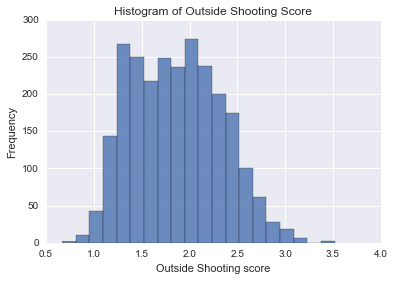

In [2]:
# Plot Meta-Feature

plt.figure()
plt.title('Histogram of Outside Shooting Score')
plt.xlabel('Outside Shooting score')
df['OS2'].plot.hist(bins=20, alpha=0.8)

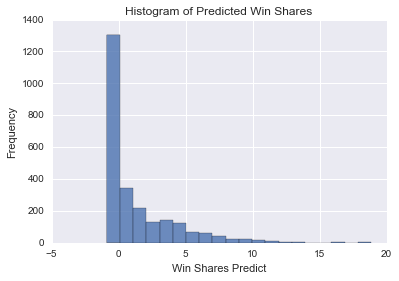

In [3]:
# Plot the target

plt.figure()
plt.title('Histogram of Predicted Win Shares')
plt.xlabel('Win Shares Predict')
df['WSPredict'].plot.hist(bins=20, alpha=0.8)

## Feature Examination

In [4]:
possible = list(df[['2P%', '2PA', '2PM', 'AST', 'ATr', 'Age', 'Agility', 'BLK', 'DEF', 'FG%', 'FGA', 'FGM', 'FT%', \
                    'FTA', 'FTr', 'Height', 'Max_Vert', 'Vert_adj', 'NS_Vert', 'Move_adj', 'OFF', 'PTS', 'STL', \
                    'Speed', 'WHr', 'Weight', 'Wingspan', 'OS2', 'IS2', 'D', 'TRB', 'P', 'TS', 'eFG', 'Stocks', \
                    'Stocks2', 'RSB', 'RSB2', 'WtHr', 'MIN', 'HtPosHt']])

target_cols = list(df[['WSPredict']])

X = df[possible].fillna(0)
y = df[target_cols]
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns=possible)
X.head()

groups = list(df['Url'])
group_kfold = GroupShuffleSplit(n_splits=1000)
for train_index, test_index in group_kfold.split(X, y, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]
    
# Use Random Forest for feature importances
def FeatureComparison(X_train, X_test, Y_train, Y_test):
    reg = RandomForestRegressor(max_features=None)
    reg.fit(X_train, Y_train)
    feature_names = sorted([(possible[i], reg.feature_importances_[i]) for i in range(len(possible))], \
                           key=lambda x: x[1], reverse=True)
    print "Regressor: Random Forest"
    print "Feature Names and Importance Scores:", feature_names
    print
    reg = ExtraTreesRegressor(max_features=None)
    reg.fit(X_train, Y_train)
    feature_names = sorted([(possible[i], reg.feature_importances_[i]) for i in range(len(possible))], \
                           key=lambda x: x[1], reverse=True)
    print "Regressor: Extra Trees"
    print "Feature Names and Importance Scores:", feature_names
    
FeatureComparison(X_train, X_test, Y_train, Y_test)

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Regressor: Random Forest
Feature Names and Importance Scores: [('Age', 0.10248140642730159), ('MIN', 0.062783459592495372), ('D', 0.05613861320051361), ('DEF', 0.046758854711061816), ('TS', 0.036665101271689995), ('FTr', 0.035934444993302381), ('Wingspan', 0.03455434047520449), ('ATr', 0.030620168711481204), ('Move_adj', 0.030373463608578805), ('WHr', 0.029473973090665666), ('HtPosHt', 0.028095269981617189), ('WtHr', 0.027913938131253556), ('PTS', 0.02723302646661906), ('RSB', 0.026177586430599569), ('AST', 0.025901278908348431), ('Speed', 0.024801270398572398), ('OS2', 0.024629780754541725), ('eFG', 0.02351202308712436), ('Agility', 0.022268315172999147), ('P', 0.021425795700146123), ('IS2', 0.020445287968901167), ('FT%', 0.019845049463308881), ('FTA', 0.019706386743091799), ('STL', 0.017926137417991907), ('FGA', 0.016424066235788716), ('Stocks2', 0.015604023319345673), ('2P%', 0.01556270723556138), ('Stocks', 0.013667791383182137), ('Vert_adj', 0.013161683512818993), ('FGM', 0.013001

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Regressor: Extra Trees
Feature Names and Importance Scores: [('Age', 0.085050447094758591), ('MIN', 0.046889622043720797), ('D', 0.04142181593655897), ('PTS', 0.041183562497950008), ('DEF', 0.039239478199831188), ('HtPosHt', 0.033061955433293128), ('Weight', 0.032201123040164488), ('FTr', 0.029960943887440843), ('ATr', 0.029436777636189571), ('AST', 0.028195182501859269), ('Wingspan', 0.028163209167270397), ('FT%', 0.026506375726682831), ('P', 0.023450195041506902), ('FTA', 0.023238531892040067), ('TS', 0.022985709349257991), ('eFG', 0.022877499347005465), ('Height', 0.022754707319965158), ('OS2', 0.022471409051884526), ('RSB', 0.022347877592497546), ('WHr', 0.021728444815436235), ('STL', 0.020469840122806442), ('WtHr', 0.020341800396411369), ('RSB2', 0.02007453374310466), ('IS2', 0.019986243564912361), ('Vert_adj', 0.019741615597557625), ('2PM', 0.019054639961274617), ('BLK', 0.018615950033791351), ('FGA', 0.017794942217798655), ('FG%', 0.01743601656688188), ('TRB', 0.0174076971391553

## Perform Linear Regression

In [5]:
feature_cols = list(df[['Age', 'PTS', 'TS', 'TRB', 'STL', 'BLK', 'FTr', 'AST', 'ATr', 'FT%', 'PF', 'HtPosHt']])
target_cols = list(df[['WSPredict']])

X = df[feature_cols].fillna(np.mean(df[feature_cols]))
y = df[target_cols]
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns=feature_cols)
X.head()

,Age,PTS,TS,TRB,STL,BLK,FTr,AST,ATr,FT%,PF,HtPosHt
0,0.288846,0.295981,0.385864,0.325872,0.642971,0.338844,0.462382,0.796743,0.751882,0.354432,0.253530,0.629995
1,0.395519,0.371024,0.479095,0.275910,0.579534,0.342885,0.460030,0.850582,0.860577,0.447922,0.236098,0.629995
2,0.502192,0.404229,0.460827,0.286182,0.428338,0.000000,0.388169,0.794592,0.742906,0.404382,0.169960,0.629995
3,0.153458,0.156009,0.439661,0.219030,0.510211,0.308290,0.346737,0.683830,0.615449,0.527916,0.468421,0.387689
4,0.260132,0.376978,0.509075,0.247185,0.505748,0.386668,0.447677,0.777268,0.682193,0.674349,0.338128,0.387689


In [6]:
lr = linear_model.LinearRegression()
lr.fit(X, y)

predicted = cross_val_predict(lr, X, y, groups=groups, cv=100)
RMSE = mean_squared_error(y, predicted)**0.5
print "RMSE:", RMSE
print "Coefficients:", lr.coef_

df['LinearPred'] = predicted

# Sort by linear prediction
df_sort = df.sort('LinearPred', ascending=False)
df_sort[0:50]

RMSE: 2.43816923397
Coefficients: [[-6.26060431  3.49551282  2.39878142  3.43035853  1.46138872  1.69602443
   0.46231398  1.75849574  1.61286415  0.49559288 -1.91036792  0.51842102]]


C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Name,Season,FG% 2pt Jumpers,Max_Vert,NS_Vert,IS_Score,P_Score,D_Score,OS_Score,%assisted at rim,3PA,FGA,FGM,WtHr,HtPosHt,FG%,FG% at rim,Height,WHr,%of shots 3pt,3P%,PTS,0,FT%,%assisted 3s,3PM,FTr,FGatRim,FTA,% shots 2pt J,%assisted 2pt J,TOV,FTM,% shots at rim,PF,STL,2ptJUnAssisted,3ptJUnAssisted,RimUnAssisted,TRB,Weight,Agility,DEF,2ptJ,Stocks,RSB,RSB2,OFF,ATr,Speed,BLK,AST,Stocks2,2P%,2PA,2PM,3PAr,AST%,A_Score,Age,Ast/TO,Athleticism,BLK%,Born,DRB%,DRtg,DWS,Drafted,Drafted_x,Drafted_y,FT/FGA,FTA/FGA,GP,League,MIN,ORB%,ORtg,OWS,PER,PPM,PPR,PPS,Pick,Pick_x,Pick_y,PosHeight,Position,STL%,TOV%,TRB%,TS,TS%,USG%,Url,WS,WSPredict,WSTOT,Wingspan,eFG,eFG%,Vert_adj,Move_adj,OS,IS,D,P,IS2,OS2,Valid,LinearPred
3024,Michael Beasley,2008.0,NaN,35.000000,30.000000,16.521516,3.687374,3.092687,2.980596,NaN,3.132161,22.354925,10.563953,0.514423,0.985710,0.329718,NaN,2999.818661,1.043543,NaN,0.178867,145.231024,NaN,0.463685,NaN,1.012676,0.396233,NaN,7.504215,NaN,NaN,2.396802,2.240797,NaN,2.223844,1.236526,NaN,NaN,NaN,3.976642,10.344080,1.800000,3.303436,NaN,1.869452,4.394147,6.894384,1.705109,0.773821,2.210239,1.184098,1.101868,1.316708,0.502029,19.548788,9.534930,0.141994,9.28,12.668501,18.978082,0.40,NaN,5.57,1989.021918,29.98,86.2,3.01,2008.0,2008.0,2008.0,0.48,NaN,NaN,NaN,520.0,13.55,124.8,5.99,37.15,1.825985,-6.37,1.50,2.0,2.0,2.0,211.015428,NaN,2.34,11.81,21.58,0.543165,0.610,35.08,http://basketball.realgm.com/player/Michael-Be...,NaN,3.870000,13.159968,213.995,0.496915,0.563,1050.000000,3.978430,2.478883,12.148978,2.503058,2.537720,12.148978,2.478883,0.0,5.961058
2569,Kevin Durant,2007.0,NaN,33.500000,26.000000,20.797851,4.441488,3.904443,4.663836,NaN,5.773411,21.656504,9.082920,0.529126,1.007099,0.275542,NaN,2956.656219,1.144728,NaN,0.196854,123.890533,NaN,0.543338,NaN,1.680606,0.340509,NaN,6.297150,NaN,NaN,2.212727,2.047183,NaN,1.887696,1.439656,NaN,NaN,NaN,3.610993,10.440307,1.857418,3.106656,NaN,2.043678,4.149204,7.540662,1.514338,0.813039,2.290962,1.204376,1.113851,1.445078,0.449464,15.568571,6.798485,0.270173,8.63,15.882844,18.256621,0.46,NaN,5.52,1988.743379,23.98,92.3,2.92,2007.0,2007.0,2007.0,0.40,NaN,NaN,NaN,627.5,9.04,120.3,5.83,32.71,1.754167,-5.23,1.39,2.0,2.0,2.0,204.547820,NaN,3.01,11.40,16.55,0.521041,0.587,33.25,http://basketball.realgm.com/player/Kevin-Dura...,NaN,18.845000,125.591593,225.425,0.472421,0.535,871.000000,4.255272,2.619402,10.971900,2.629288,2.540711,10.971900,2.619402,0.0,5.835247
3707,Sean Banks,2004.0,NaN,31.500000,25.000000,NaN,NaN,NaN,NaN,NaN,8.002840,13.451551,5.392061,0.467980,0.992433,0.257359,NaN,2892.304790,1.096819,NaN,0.188149,129.044334,NaN,0.420190,NaN,2.100812,0.592829,NaN,7.670668,NaN,NaN,2.714448,2.236006,NaN,2.373003,1.109234,NaN,NaN,NaN,3.433620,9.746794,1.830301,2.826482,NaN,1.672234,3.819177,4.766138,1.566881,0.813677,2.254190,1.118653,1.193081,1.178168,0.525240,4.236900,2.162095,0.602934,10.02,NaN,18.947945,0.47,NaN,5.28,1985.052055,13.78,125.5,-0.79,2005.0,NaN,NaN,0.83,NaN,NaN,NaN,516.0,6.67,114.4,2.68,22.02,1.197800,-6.51,2.31,NaN,NaN,NaN,204.547820,NaN,1.64,18.82,10.16,0.741747,0.827,24.78,http://basketball.realgm.com/player/Sean-Banks...,NaN,0.000000,0.000000,215.900,0.519180,0.588,787.500000,4.125845,2.924508,9.287611,2.153231,2.718131,9.287611,2.924508,1.0,5.775953
2583,Kevin Love,2008.0,NaN,35.000000,29.500000,18.493487,4.811001,3.703366,4.589578,NaN,2.714309,15.792409,7.842218,0.548077,0.985710,0.355135,NaN,2999.818661,1.025019,NaN,0.161465,101.880403,NaN,0.451218,NaN,0.863646,0.486351,NaN,7.097585,NaN,NaN,2.073501,2.149664,NaN,2.064994,0.993398,NaN,NaN,NaN,4.018583,10.677078,1.794436,3.286017,NaN,1.741728,4.379797,5.711251,1.753384,1.033570,2.217469,1.196100,1.307315,1.192145,0.545666,13.192975,6.994205,0.174184,14.07,13.785228,19.316895,0.96,NaN,5.12,1988.683105,28.53,85.4,3.44,2008.0,2008.0,2008.0,0.64,NaN,NaN,NaN,578.0,15.60,132.2,6.58,33.82,1.636243,-2.54,1.68,5.0,5.0,5.0,211.015428,NaN,1.48,12.86,22.22,0.575318,0.644,27.12,http://basketball.realgm.com/player/Kevin-Love..

In [7]:
# Determine Error
df['LinearErr'] = df['WSPredict'] - df['LinearPred']

## Implement Machine Learning Algorithm to Estimate Error

In [8]:
feature_cols = list(df[['Move_adj', 'Vert_adj', 'WHr', 'WtHr', 'Height', 'OS2', 'D', 'IS2', 'P', 'FTr', 'LinearPred']])
X = df[feature_cols].fillna(np.mean(df[feature_cols]))
y = df['LinearErr']
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns=feature_cols)

groups = list(df['Url'])
group_kfold = GroupShuffleSplit(n_splits=1000)
for train_index, test_index in group_kfold.split(X, y, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]

In [9]:
RMSE = make_scorer(mean_squared_error, greater_is_better = False)

N = float(len(df))
p = float(len(feature_cols))
targets = 1

def RandomForest(X_train, X_test, Y_train, Y_test):
    reg = RandomForestRegressor(max_features=None)
    reg.fit(X_train, Y_train)
    feature_names = sorted([(feature_cols[i], reg.feature_importances_[i]) for i in range(len(feature_cols))], \
                           key=lambda x: x[1], reverse=True)
    
    pred = reg.predict(X_test)
    Y_test = Y_test.values
    r2 = reg.score(X_test, Y_test)
    adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
    print "Regressor: Random Forest"
    print "Feature Names and Importance Scores:", feature_names
    print 'R-Squared:', r2
    print 'Adj. R-Squared:', adj_r2
    RMSE = mean_squared_error(Y_test, pred)**0.5
    print "RMSE:", RMSE
    
def Tree(X_train, X_test, Y_train, Y_test):
    reg = DecisionTreeRegressor()
    reg.fit(X_train, Y_train)
    feature_names = sorted([(feature_cols[i], reg.feature_importances_[i]) for i in range(len(feature_cols))], \
                           key=lambda x: x[1], reverse=True)
    
    pred = reg.predict(X_test)
    Y_test = Y_test.values
    r2 = reg.score(X_test, Y_test)
    adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
    print "Regressor: Decision Tree"
    print "Feature Names and Importance Scores:", feature_names
    print 'R-Squared:', r2
    print 'Adj. R-Squared:', adj_r2
    RMSE = mean_squared_error(Y_test, pred)**0.5
    print "RMSE:", RMSE
    print
    
def ExtraTrees(X_train, X_test, Y_train, Y_test):
    reg = ExtraTreesRegressor(max_features=None)
    reg.fit(X_train, Y_train)
    feature_names = sorted([(feature_cols[i], reg.feature_importances_[i]) for i in range(len(feature_cols))], \
                           key=lambda x: x[1], reverse=True)
    
    pred = reg.predict(X_test)
    Y_test = Y_test.values
    r2 = reg.score(X_test, Y_test)
    adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
    print "Regressor: Extra Trees Regressor"
    print "Feature Names and Importance Scores:", feature_names
    print 'R-Squared:', r2
    print 'Adj. R-Squared:', adj_r2
    RMSE = mean_squared_error(Y_test, pred)**0.5
    print "RMSE:", RMSE
    print
    
def NN(X_train, X_test, Y_train, Y_test):
    reg = KNeighborsRegressor(n_neighbors=20, weights='distance')
    reg.fit(X_train, Y_train)
    pred = reg.predict(X_test)
    Y_test = Y_test.values
    r2 = reg.score(X_test, Y_test)
    adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
    print "Regressor: Nearest Neighbor"
    print 'R-Squared:', r2
    print 'Adj. R-Squared:', adj_r2
    RMSE = mean_squared_error(Y_test, pred)**0.5
    print "RMSE:", RMSE
    print
    
def Linear(X_train, X_test, Y_train, Y_test):
    reg = linear_model.LinearRegression(fit_intercept=True)
    reg.fit(X_train, Y_train)
    pred = reg.predict(X_test)
    Y_test = Y_test.values
    r2 = reg.score(X_test, Y_test)
    adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
    print "Regressor: Linear Regression"
    print 'R-Squared:', r2
    print 'Adj. R-Squared:', adj_r2
    RMSE = mean_squared_error(Y_test, pred)**0.5
    print "RMSE:", RMSE
    print
    
def Gradient(X_train, X_test, Y_train, Y_test):
    reg = GradientBoostingRegressor()
    reg.fit(X_train, Y_train)
    pred = reg.predict(X_test)
    Y_test = Y_test.values
    r2 = reg.score(X_test, Y_test)
    adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
    print "Regressor: Gradient Boost"
    print 'R-Squared:', r2
    print 'Adj. R-Squared:', adj_r2
    RMSE = mean_squared_error(Y_test, pred)**0.5
    print "RMSE:", RMSE
    print
    
def Bagging(X_train, X_test, Y_train, Y_test):
    reg = BaggingRegressor()
    reg.fit(X_train, Y_train)
    pred = reg.predict(X_test)
    Y_test = Y_test.values
    r2 = reg.score(X_test, Y_test)
    adj_r2 = 1 - ((1 - r2)*(N - 1)/(N - p - 1))
    print "Regressor: Bagging"
    print 'R-Squared:', r2
    print 'Adj. R-Squared:', adj_r2
    RMSE = mean_squared_error(Y_test, pred)**0.5
    print "RMSE:", RMSE
    print
    
Linear(X_train, X_test, Y_train, Y_test)
RandomForest(X_train, X_test, Y_train, Y_test)
ExtraTrees(X_train, X_test, Y_train, Y_test)
NN(X_train, X_test, Y_train, Y_test)
Bagging(X_train, X_test, Y_train, Y_test)
Gradient(X_train, X_test, Y_train, Y_test)
Tree(X_train, X_test, Y_train, Y_test)

Regressor: Linear Regression
R-Squared: -0.0037167990256
Adj. R-Squared: -0.00811380611014
RMSE: 2.28431519567

Regressor: Random Forest
Feature Names and Importance Scores: [('LinearPred', 0.20147669262886442), ('Move_adj', 0.13972885707973681), ('Vert_adj', 0.10955257175424271), ('WHr', 0.093478108402029164), ('OS2', 0.087988064739592045), ('WtHr', 0.079100324439652342), ('Height', 0.071354190659269609), ('FTr', 0.066058168612070839), ('P', 0.065104344579849191), ('IS2', 0.043293221943825115), ('D', 0.042865455160867774)]
R-Squared: -0.197734748085
Adj. R-Squared: -0.202981694413
RMSE: 2.49534591013
Regressor: Extra Trees Regressor
Feature Names and Importance Scores: [('LinearPred', 0.14986626093143726), ('Vert_adj', 0.13498833938025717), ('Height', 0.11047512033951845), ('WHr', 0.10556947045455237), ('Move_adj', 0.10373811882504476), ('WtHr', 0.086849946792072294), ('OS2', 0.076924815874764157), ('FTr', 0.070494258712244975), ('P', 0.062989968214321387), ('D', 0.049351768704929556)

## Hyperparameter Optimization

In [10]:
# Best performing Regressors
rfc = RandomForestRegressor()
dtc = DecisionTreeRegressor()
nn = KNeighborsRegressor(weights='distance', n_neighbors=25)
etc = ExtraTreesRegressor(n_estimators=50, min_samples_split=4, min_samples_leaf=4)
gb = GradientBoostingRegressor()
rr = linear_model.Ridge()
bag = BaggingRegressor()

RMSE = make_scorer(mean_squared_error, greater_is_better = False)

# GridSearchCV is used to compare parameters. Parameters were tuned manually
# based on their performance using an increasing amount of folds. The
# following represents the final iteration of tuning.
params_etc = {'etc__n_estimators': [50],
             'etc__min_samples_split': [2, 3, 4, 5],
             'etc__min_impurity_split': [1e-07],
             'etc__min_samples_leaf': [2, 3, 4],
             'etc__min_weight_fraction_leaf': [0],
             'kbest__score_func': [f_regression],
             'kbest__k': ['all']}

params_rfc = {'rfc__n_estimators': [50],
             'rfc__max_features': [None],
             'rfc__max_depth': [None],
             'rfc__min_samples_split': [3, 4],
             'rfc__min_samples_leaf': [2, 3],
             'rfc__min_weight_fraction_leaf': [0],
             'kbest__score_func': [f_regression],
             'kbest__k': ['all']}

params_gb = {'gb__loss': ['ls'],
             'gb__learning_rate': [0.2, 0.4, 0.6],
             'gb__alpha': [0.9, 0.8, 0.7]}
             

params_nn = {'nn__n_neighbors': [15, 20, 25, 100],
             'nn__weights': ['distance'],
             'nn__leaf_size': [3, 5, 7],
             'kbest__k': ['all']}

params_bag = {'bag__base_estimator': [etc, nn],
             'bag__n_estimators': [50]}

params_rr = {'kbest__score_func': [f_regression],
             'kbest__k': ['all']}

params_lr = {'kbest__score_func': [f_regression],
             'kbest__k': ['all']}

parameters = [params_bag]

clf_list = [('bag', bag)]

estimators = []
for clf_i in range(len(clf_list)):
    cv = GroupShuffleSplit(n_splits=10, random_state=2)
    kbest2 = SelectKBest(f_regression, k='all')
    pipeline = Pipeline([('kbest', kbest2), (clf_list[clf_i])])
    gs = GridSearchCV(pipeline, scoring=RMSE, cv=cv, param_grid=parameters[clf_i])
    gs.fit(X, y, groups)
    pred = gs.predict(X)
    clf = gs.best_estimator_
    estimators.append(clf)
    print "Best Estimator:", clf
    print "Best RMSE Score: %.3f" % (gs.best_score_*-1)**0.5
    print

Best Estimator: Pipeline(steps=[('kbest', SelectKBest(k='all', score_func=<function f_regression at 0x000000000A59C3C8>)), ('bag', BaggingRegressor(base_estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_...estimators=50, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False))])
Best RMSE Score: 2.492



In [11]:
X2 = X.values
y2 = y.values

In [12]:
# Predict Error
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(estimators[0], X2, y2, groups, cv=10)
df['Prediction'] = predicted

In [13]:
df.sort('Prediction', ascending=False)

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Name,Season,FG% 2pt Jumpers,Max_Vert,NS_Vert,IS_Score,P_Score,D_Score,OS_Score,%assisted at rim,3PA,FGA,FGM,WtHr,HtPosHt,FG%,FG% at rim,Height,WHr,%of shots 3pt,3P%,PTS,0,FT%,%assisted 3s,3PM,FTr,FGatRim,FTA,% shots 2pt J,%assisted 2pt J,TOV,FTM,% shots at rim,PF,STL,2ptJUnAssisted,3ptJUnAssisted,RimUnAssisted,TRB,Weight,Agility,DEF,2ptJ,Stocks,RSB,RSB2,OFF,ATr,Speed,BLK,AST,Stocks2,2P%,2PA,2PM,3PAr,AST%,A_Score,Age,Ast/TO,Athleticism,BLK%,Born,DRB%,DRtg,DWS,Drafted,Drafted_x,Drafted_y,FT/FGA,FTA/FGA,GP,League,MIN,ORB%,ORtg,OWS,PER,PPM,PPR,PPS,Pick,Pick_x,Pick_y,PosHeight,Position,STL%,TOV%,TRB%,TS,TS%,USG%,Url,WS,WSPredict,WSTOT,Wingspan,eFG,eFG%,Vert_adj,Move_adj,OS,IS,D,P,IS2,OS2,Valid,LinearPred,LinearErr,Prediction
3024,Michael Beasley,2008.0,NaN,35.000000,30.000000,16.521516,3.687374,3.092687,2.980596,NaN,3.132161,22.354925,10.563953,0.514423,0.985710,0.329718,NaN,2999.818661,1.043543,NaN,0.178867,145.231024,NaN,0.463685,NaN,1.012676,0.396233,NaN,7.504215,NaN,NaN,2.396802,2.240797,NaN,2.223844,1.236526,NaN,NaN,NaN,3.976642,10.344080,1.800000,3.303436,NaN,1.869452,4.394147,6.894384,1.705109,0.773821,2.210239,1.184098,1.101868,1.316708,0.502029,19.548788,9.534930,0.141994,9.280000,12.668501,18.978082,0.400000,NaN,5.570000,1989.021918,29.980000,86.200000,3.010000,2008.0,2008.0,2008.0,0.480000,NaN,NaN,NaN,520.0,13.550000,124.800000,5.990000,37.150000,1.825985,-6.370000,1.500000,2.0,2.0,2.0,211.015428,NaN,2.340000,11.810000,21.580000,0.543165,0.610000,35.080000,http://basketball.realgm.com/player/Michael-Be...,NaN,3.870000,13.159968,213.9950,0.496915,0.563000,1050.000000,3.978430,2.478883,12.148978,2.503058,2.537720,12.148978,2.478883,0.0,5.961058,-2.091058,3.780408
2583,Kevin Love,2008.0,NaN,35.000000,29.500000,18.493487,4.811001,3.703366,4.589578,NaN,2.714309,15.792409,7.842218,0.548077,0.985710,0.355135,NaN,2999.818661,1.025019,NaN,0.161465,101.880403,NaN,0.451218,NaN,0.863646,0.486351,NaN,7.097585,NaN,NaN,2.073501,2.149664,NaN,2.064994,0.993398,NaN,NaN,NaN,4.018583,10.677078,1.794436,3.286017,NaN,1.741728,4.379797,5.711251,1.753384,1.033570,2.217469,1.196100,1.307315,1.192145,0.545666,13.192975,6.994205,0.174184,14.070000,13.785228,19.316895,0.960000,NaN,5.120000,1988.683105,28.530000,85.400000,3.440000,2008.0,2008.0,2008.0,0.640000,NaN,NaN,NaN,578.0,15.600000,132.200000,6.580000,33.820000,1.636243,-2.540000,1.680000,5.0,5.0,5.0,211.015428,NaN,1.480000,12.860000,22.220000,0.575318,0.644000,27.120000,http://basketball.realgm.com/player/Kevin-Love...,NaN,13.523788,75.731831,211.4550,0.524766,0.595000,1032.500000,3.979106,2.220689,11.262859,2.403309,2.852765,11.262859,2.220689,0.0,5.424789,8.098999,3.365164
1488,Eddie Basden,2004.0,NaN,36.500000,33.000000,NaN,NaN,NaN,NaN,NaN,2.426316,10.454315,5.366061,0.500000,0.993738,0.373394,NaN,2744.000000,1.100450,NaN,0.180285,73.192281,NaN,0.267090,NaN,0.839492,0.619070,NaN,6.630336,NaN,NaN,2.840562,1.882452,NaN,2.574188,2.082677,NaN,NaN,NaN,3.610986,9.899495,1.791647,2.878096,NaN,2.128123,4.191434,3.289847,1.684042,1.161000,2.174028,0.661400,1.585619,0.954498,0.581985,7.959179,4.500373,0.235207,29.170000,NaN,20.878311,1.370000,NaN,0.740000,1983.121690,14.220000,122.800000,-0.420000,2005.0,2005.0,2005.0,0.880000,NaN,NaN,NaN,425.0,8.700000,126.000000,3.470000,26.300000,1.275070,-0.920000,2.030000,NaN,NaN,NaN,197.235161,NaN,6.250000,23.770000,11.490000,0.643744,0.717000,20.780000,http://basketball.realgm.com/player/Eddie-Basd...,NaN,0.200000,0.200000,208.9150,0.555681,0.630000,1204.500000,3.895092,2.045452,10.214644,2.472397,3.377547,10.214644,2.045452,1.0,3.994459,-3.794459,3.332761
3514,Rodney Carney,2004.0,NaN,38.500000,32.000000,10.480659,2.428807,1.921284,2.624844,NaN,11.592797,15.172655,5.361312,0.462687,1.019088,0.213354,NaN,2849.666823,1.054817,NaN,0.173234,120.909803,NaN,0.321419,NaN,2.661036,0.338834,NaN,4.798524,NaN,NaN,2.352028,1.564358,NaN,2.619175,1.327756,NaN,NaN,NaN,3.602140,9.643651,1.749286,3.115262,NaN,2.053221,4.146219,7.490455,1.497721,0.922723,2.177433,1.251453,1.

In [14]:
# Add the error prediction to the linear prediction
df['SecondPred'] = df['Prediction'] + df['LinearPred']

In [15]:
df.sort('SecondPred', ascending=False)[0:50]

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Name,Season,FG% 2pt Jumpers,Max_Vert,NS_Vert,IS_Score,P_Score,D_Score,OS_Score,%assisted at rim,3PA,FGA,FGM,WtHr,HtPosHt,FG%,FG% at rim,Height,WHr,%of shots 3pt,3P%,PTS,0,FT%,%assisted 3s,3PM,FTr,FGatRim,FTA,% shots 2pt J,%assisted 2pt J,TOV,FTM,% shots at rim,PF,STL,2ptJUnAssisted,3ptJUnAssisted,RimUnAssisted,TRB,Weight,Agility,DEF,2ptJ,Stocks,RSB,RSB2,OFF,ATr,Speed,BLK,AST,Stocks2,2P%,2PA,2PM,3PAr,AST%,A_Score,Age,Ast/TO,Athleticism,BLK%,Born,DRB%,DRtg,DWS,Drafted,Drafted_x,Drafted_y,FT/FGA,FTA/FGA,GP,League,MIN,ORB%,ORtg,OWS,PER,PPM,PPR,PPS,Pick,Pick_x,Pick_y,PosHeight,Position,STL%,TOV%,TRB%,TS,TS%,USG%,Url,WS,WSPredict,WSTOT,Wingspan,eFG,eFG%,Vert_adj,Move_adj,OS,IS,D,P,IS2,OS2,Valid,LinearPred,LinearErr,Prediction,SecondPred
3024,Michael Beasley,2008.0,NaN,35.000000,30.000000,16.521516,3.687374,3.092687,2.980596,NaN,3.132161,22.354925,10.563953,0.514423,0.985710,0.329718,NaN,2999.818661,1.043543,NaN,0.178867,145.231024,NaN,0.463685,NaN,1.012676,0.396233,NaN,7.504215,NaN,NaN,2.396802,2.240797,NaN,2.223844,1.236526,NaN,NaN,NaN,3.976642,10.344080,1.800000,3.303436,NaN,1.869452,4.394147,6.894384,1.705109,0.773821,2.210239,1.184098,1.101868,1.316708,0.502029,19.548788,9.534930,0.141994,9.28,12.668501,18.978082,0.40,NaN,5.57,1989.021918,29.98,86.2,3.01,2008.0,2008.0,2008.0,0.48,NaN,NaN,NaN,520.0,13.55,124.8,5.99,37.15,1.825985,-6.37,1.50,2.0,2.0,2.0,211.015428,NaN,2.34,11.81,21.58,0.543165,0.610,35.08,http://basketball.realgm.com/player/Michael-Be...,NaN,3.870000,13.159968,213.995,0.496915,0.563,1050.000000,3.978430,2.478883,12.148978,2.503058,2.537720,12.148978,2.478883,0.0,5.961058,-2.091058,3.780408,9.741466
2583,Kevin Love,2008.0,NaN,35.000000,29.500000,18.493487,4.811001,3.703366,4.589578,NaN,2.714309,15.792409,7.842218,0.548077,0.985710,0.355135,NaN,2999.818661,1.025019,NaN,0.161465,101.880403,NaN,0.451218,NaN,0.863646,0.486351,NaN,7.097585,NaN,NaN,2.073501,2.149664,NaN,2.064994,0.993398,NaN,NaN,NaN,4.018583,10.677078,1.794436,3.286017,NaN,1.741728,4.379797,5.711251,1.753384,1.033570,2.217469,1.196100,1.307315,1.192145,0.545666,13.192975,6.994205,0.174184,14.07,13.785228,19.316895,0.96,NaN,5.12,1988.683105,28.53,85.4,3.44,2008.0,2008.0,2008.0,0.64,NaN,NaN,NaN,578.0,15.60,132.2,6.58,33.82,1.636243,-2.54,1.68,5.0,5.0,5.0,211.015428,NaN,1.48,12.86,22.22,0.575318,0.644,27.12,http://basketball.realgm.com/player/Kevin-Love...,NaN,13.523788,75.731831,211.455,0.524766,0.595,1032.500000,3.979106,2.220689,11.262859,2.403309,2.852765,11.262859,2.220689,0.0,5.424789,8.098999,3.365164,8.789954
3514,Rodney Carney,2004.0,NaN,38.500000,32.000000,10.480659,2.428807,1.921284,2.624844,NaN,11.592797,15.172655,5.361312,0.462687,1.019088,0.213354,NaN,2849.666823,1.054817,NaN,0.173234,120.909803,NaN,0.321419,NaN,2.661036,0.338834,NaN,4.798524,NaN,NaN,2.352028,1.564358,NaN,2.619175,1.327756,NaN,NaN,NaN,3.602140,9.643651,1.749286,3.115262,NaN,2.053221,4.146219,7.490455,1.497721,0.922723,2.177433,1.251453,1.251128,1.442028,0.563942,1.622474,0.888957,0.774328,12.50,9.237126,19.739041,0.68,NaN,8.28,1984.260959,16.95,122.3,-0.34,2006.0,2006.0,2006.0,0.39,NaN,NaN,NaN,376.5,5.82,106.1,1.16,21.55,1.197800,-4.35,1.96,16.0,16.0,16.0,197.235161,NaN,2.38,16.62,11.27,0.732435,0.825,23.74,http://basketball.realgm.com/player/Rodney-Car...,NaN,1.480000,5.830000,208.280,0.498025,0.565,1232.000000,3.808952,3.108248,8.602269,2.400631,2.780790,8.602269,3.108248,2.0,5.421478,-3.941478,3.222666,8.644144
390,Blake Griffin,2009.0,NaN,35.500000,32.000000,19.436935,4.673179,3.581850,2.793872,NaN,0.278819,16.673339,9.699940,0.548077,0.985710,0.450440,NaN,2999.818661,1.025019,NaN,0.147312,116.132257,NaN,0.203297,NaN,0.149901,0.528315,NaN,8.030349,NaN,NaN,2.639871,2.042547,NaN,2.218176,1.155024,NaN,NaN,NaN,4.288565,10.677078,1.811077,3.695890,NaN,1.654259,4.596559,5.866152,1.691209,0.928860,2.202960,1.088241,1.306761,1.169555,0.590632,17.111135,9.818934,0.016947,16.18,15.834146,19.792237,0.70,NaN,3.59,1989.207763,32.28,87.1,3.24,2009.0,2009.0,2009.0,0.71,NaN,NaN,NaN,582.5

In [16]:
RMSE = mean_squared_error(df['SecondPred'], df['WSPredict'])**0.5
print "RMSE:", RMSE

RMSE: 2.32267441191


In [17]:
# Apply weights to produce final prediction
g = df.groupby('Url')
last = list(df['Drafted'] - df['Season'])
weights = []
for item in last:
    if item == 0:
        weights.append(1)
    elif item == 1:
        weights.append(0.4)
    elif item == 2:
        weights.append(0.15)
    else:
        weights.append(0)
df['Weights'] = weights
df['PredxWeights'] = (df.SecondPred * df.Weights) / (g.Weights.transform("sum"))
df['FinalPred'] = df.groupby('Url').PredxWeights.transform('sum').fillna(df['SecondPred'])
df2 = df.groupby('Url').last().reset_index()
df2['WSTOT'] = df2['WSTOT'].fillna(0)

## Compare Models

In [18]:
# Sort by pick to get actual selections
df3 = df2.sort('Pick')
df2006P = df3.loc[df3['Drafted'] == 2006]
df2007P = df3.loc[df3['Drafted'] == 2007]
df2008P = df3.loc[df3['Drafted'] == 2008]
df2009P = df3.loc[df3['Drafted'] == 2009]
df2010P = df3.loc[df3['Drafted'] == 2010]
df2011P = df3.loc[df3['Drafted'] == 2011]
df2012P = df3.loc[df3['Drafted'] == 2012]
df2013P = df3.loc[df3['Drafted'] == 2013]
df2014P = df3.loc[df3['Drafted'] == 2014]
df2015P = df3.loc[df3['Drafted'] == 2015]

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [19]:
# Computations necessary to apply DRV
dfs = [df2006P, df2007P, df2008P, df2009P, df2010P, df2011P, df2012P, df2013P, df2014P, df2015P]
for item in dfs:
    df_sort = item.sort('WSTOT', ascending=False)
    df_reverse = item.sort('WSTOT', ascending=True)
    item['WS_Sort'] = list(df_sort['WSTOT'])
    item['WS_Reverse'] = list(df_reverse['WSTOT'])
    item['WSMax'] = np.max(item['WSTOT'])
    item['WSMin'] = np.min(item['WSTOT'])
    item['RMSE_r'] = mean_squared_error(item['WSTOT'], item['WS_Sort'])**0.5
    item['RMSE_w'] = mean_squared_error(item['WS_Sort'], item['WS_Reverse'])**0.5
    item['DRV'] = 100*(1-(item['RMSE_r']/item['RMSE_w']))
    
df4 = pd.concat(dfs)

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

In [20]:
# Now sort by algorithm projections
df5 = df2.sort('FinalPred', ascending=False)
df2006F = df5.loc[df5['Drafted'] == 2006]
df2007F = df5.loc[df5['Drafted'] == 2007]
df2008F = df5.loc[df5['Drafted'] == 2008]
df2009F = df5.loc[df5['Drafted'] == 2009]
df2010F = df5.loc[df5['Drafted'] == 2010]
df2011F = df5.loc[df5['Drafted'] == 2011]
df2012F = df5.loc[df5['Drafted'] == 2012]
df2013F = df5.loc[df5['Drafted'] == 2013]
df2014F = df5.loc[df5['Drafted'] == 2014]
df2015F = df5.loc[df5['Drafted'] == 2015]

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [21]:
dfs = [df2006F, df2007F, df2008F, df2009F, df2010F, df2011F, df2012F, df2013F, df2014F, df2015F]
for item in dfs:
    df_sort = item.sort('WSTOT', ascending=False)
    df_reverse = item.sort('WSTOT', ascending=True)
    item['WS_Sort'] = list(df_sort['WSTOT'])
    item['WS_Reverse'] = list(df_reverse['WSTOT'])
    item['WSMax'] = np.max(item['WSTOT'])
    item['WSMin'] = np.min(item['WSTOT'])
    item['RMSE_r'] = mean_squared_error(item['WSTOT'], item['WS_Sort'])**0.5
    item['RMSE_w'] = mean_squared_error(item['WS_Sort'], item['WS_Reverse'])**0.5
    item['DRV'] = 100*(1-(item['RMSE_r']/item['RMSE_w']))
    
df6 = pd.concat(dfs)

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [22]:
# Largest Misses
df6['WS_Miss'] = df6['WS_Sort'] - df6['WSTOT']
df7 = df6.copy()
df7.sort('WS_Miss', ascending=True)

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Url,Name,Season,FG% 2pt Jumpers,Max_Vert,NS_Vert,IS_Score,P_Score,D_Score,OS_Score,%assisted at rim,3PA,FGA,FGM,WtHr,HtPosHt,FG%,FG% at rim,Height,WHr,%of shots 3pt,3P%,PTS,0,FT%,%assisted 3s,3PM,FTr,FGatRim,FTA,% shots 2pt J,%assisted 2pt J,TOV,FTM,% shots at rim,PF,STL,2ptJUnAssisted,3ptJUnAssisted,RimUnAssisted,TRB,Weight,Agility,DEF,2ptJ,Stocks,RSB,RSB2,OFF,ATr,Speed,BLK,AST,Stocks2,2P%,2PA,2PM,3PAr,AST%,A_Score,Age,Ast/TO,Athleticism,BLK%,Born,DRB%,DRtg,DWS,Drafted,Drafted_x,Drafted_y,FT/FGA,FTA/FGA,GP,League,MIN,ORB%,ORtg,OWS,PER,PPM,PPR,PPS,Pick,Pick_x,Pick_y,PosHeight,Position,STL%,TOV%,TRB%,TS,TS%,USG%,WS,WSPredict,WSTOT,Wingspan,eFG,eFG%,Vert_adj,Move_adj,OS,IS,D,P,IS2,OS2,Valid,LinearPred,LinearErr,Prediction,SecondPred,Weights,PredxWeights,FinalPred,WS_Sort,WS_Reverse,WSMax,WSMin,RMSE_r,RMSE_w,DRV,WS_Miss
740,http://basketball.realgm.com/player/Russell-We...,Russell Westbrook,2008.0,NaN,36.500000,30.000000,18.716923,5.450778,3.951461,3.692967,NaN,2.235520,13.339561,5.514763,0.476440,1.022503,0.269435,NaN,2639.672518,1.092186,NaN,0.150642,52.175691,NaN,0.362467,NaN,0.721189,0.333093,NaN,4.282980,NaN,NaN,2.195930,1.479964,NaN,2.182830,1.421126,NaN,NaN,NaN,2.285156,9.539392,1.754993,1.786502,NaN,1.497999,2.732387,1.538367,1.270529,1.256920,2.204950,0.688265,1.545449,0.820488,0.443610,11.214239,4.833260,0.169838,24.390000,15.966674,19.136530,1.740000,NaN,0.560000,1988.863470,8.430000,92.400000,3.000000,2008.0,2008.0,2008.0,0.380000,NaN,NaN,NaN,659.0,5.880000,113.100000,3.430000,18.36000,1.636243,1.220000,1.270000,4.0,4.0,4.0,186.796486,NaN,3.020000,17.200000,7.190000,0.477313,0.538000,21.890000,NaN,12.972872,79.547260,202.565,0.439979,0.499000,1095.000000,3.869672,1.951749,9.958422,1.730736,3.262689,9.958422,1.951749,0.0,2.410962,10.561910,-0.038421,2.372541,1.0,1.694672,2.079329,2.870000,0.000000,79.547260,-0.290000,18.134059,32.285887,43.832861,-76.677260
549,http://basketball.realgm.com/player/LaMarcus-A...,LaMarcus Aldridge,2006.0,NaN,34.000000,26.500000,19.896132,4.477475,3.705359,3.027947,NaN,0.000000,13.577511,6.859528,0.516588,0.999927,0.364707,NaN,3064.952039,1.104281,NaN,0.000000,64.709057,NaN,0.269586,NaN,0.000000,0.387965,NaN,5.055133,NaN,NaN,1.562608,1.573438,NaN,2.207343,1.287196,NaN,NaN,NaN,3.926523,10.440307,1.852026,3.290868,NaN,2.018888,4.415144,7.860932,1.669499,0.732689,2.271792,1.247127,0.916709,1.414923,0.507914,14.213320,7.013816,0.000000,3.300000,14.526111,20.450685,0.340000,NaN,6.550000,1985.549315,20.390000,83.300000,3.980000,2006.0,2006.0,2006.0,0.470000,NaN,NaN,NaN,623.5,10.430000,120.000000,3.890000,26.02000,1.673024,-3.730000,1.440000,2.0,2.0,2.0,211.015428,NaN,2.430000,11.130000,15.740000,0.524251,0.589000,21.160000,NaN,10.610000,90.303914,225.425,0.501831,0.569000,901.000000,4.207417,1.313263,10.922897,2.559246,2.157397,10.922897,1.313263,0.0,2.665420,7.944580,0.275577,2.940997,1.0,2.100712,2.874045,14.881296,0.000000,90.303914,-1.430000,21.669627,28.964735,25.186172,-75.422618
229,http://basketball.realgm.com/player/DeAndre-Jo...,DeAndre Jordan,2008.0,NaN,30.500000,26.000000,19.084931,3.555491,4.458667,3.074887,NaN,0.000000,11.706566,6.420185,0.568720,0.999927,0.411816,NaN,3064.952039,1.127692,NaN,0.000000,56.042992,NaN,0.083453,NaN,0.000000,0.494825,NaN,5.768968,NaN,NaN,2.380025,1.412758,NaN,2.537013,0.648662,NaN,NaN,NaN,3.665950,10.954451,1.808314,3.060538,NaN,1.750872,4.062603,3.867234,1.604612,0.673957,2.289121,1.275257,0.990038,1.027086,0.551359,12.254763,6.564591,0.000000,4.610000,15.483124,19.445205,0.260000,NaN,6.660000,1988.554795,22.490000,88.900000,1.840000,2008.0,2008.0,2008.0,0.650000,NaN,NaN,NaN,351.5,11.710000,103.700000,1.090000,19.95000,1.636041,-7.060000,1.520000,35.0,35.0,35.0,211.015428,NaN,0.640000,19.220000,17.450000,0.518412,0.580000,22.130000,NaN,12.190851,67.304732,228.600,0.544756,0.617000,793.000000,4.139449,1.269690,10.701683,2.020950,2.352186,10.701683,1.269690,0.0,2.203652,9.987200,0.630062,2.833714,1.0,2.833714,2.833714,12.114255,0.000000,79.547260,-0.290

In [23]:
# Examine comparison of model to actual picks
df4.rename(columns={'DRV':'Actual DRV'}, inplace=True)
actual = df4.groupby('Drafted').first()['Actual DRV']
print "Actual Pick DRV:", actual
print "Mean Pick DRV:", actual.mean()
print
df6.rename(columns={'DRV':'BEEM DRV'}, inplace=True)
model = df6.groupby(['Drafted']).first()['BEEM DRV']
print "BEEM DRV:", model
print "Mean BEEM DRV:", model.mean()

Actual Pick DRV: Drafted
2006.0    36.035744
2007.0    41.600128
2008.0    43.035292
2009.0    46.137360
2010.0    54.643287
2011.0    44.377283
2012.0    47.980043
2013.0    43.879554
2014.0    39.707914
2015.0    54.031956
Name: Actual DRV, dtype: float64
Mean Pick DRV: 45.1428561484

BEEM DRV: Drafted
2006.0    25.186172
2007.0    53.255848
2008.0    43.832861
2009.0    56.213778
2010.0    51.033597
2011.0    40.024872
2012.0    53.987267
2013.0    42.844233
2014.0    34.529303
2015.0    49.419695
Name: BEEM DRV, dtype: float64
Mean BEEM DRV: 45.0327626354


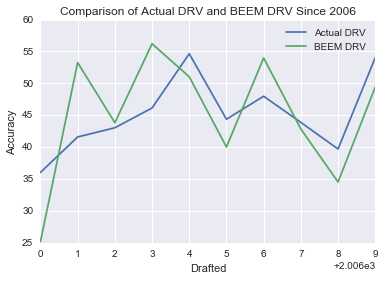

In [24]:
# Create plot of two models
df7 = pd.concat([actual, model], axis=1)
df7.plot.line()
plt.title('Comparison of Actual DRV and BEEM DRV Since 2006')
plt.ylabel('Accuracy')
plt.figure()

In [25]:
df_year = df6.loc[df6['Drafted'] == 2006]
df_year.sort('FinalPred', ascending=False)

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Url,Name,Season,FG% 2pt Jumpers,Max_Vert,NS_Vert,IS_Score,P_Score,D_Score,OS_Score,%assisted at rim,3PA,FGA,FGM,WtHr,HtPosHt,FG%,FG% at rim,Height,WHr,%of shots 3pt,3P%,PTS,0,FT%,%assisted 3s,3PM,FTr,FGatRim,FTA,% shots 2pt J,%assisted 2pt J,TOV,FTM,% shots at rim,PF,STL,2ptJUnAssisted,3ptJUnAssisted,RimUnAssisted,TRB,Weight,Agility,DEF,2ptJ,Stocks,RSB,RSB2,OFF,ATr,Speed,BLK,AST,Stocks2,2P%,2PA,2PM,3PAr,AST%,A_Score,Age,Ast/TO,Athleticism,BLK%,Born,DRB%,DRtg,DWS,Drafted,Drafted_x,Drafted_y,FT/FGA,FTA/FGA,GP,League,MIN,ORB%,ORtg,OWS,PER,PPM,PPR,PPS,Pick,Pick_x,Pick_y,PosHeight,Position,STL%,TOV%,TRB%,TS,TS%,USG%,WS,WSPredict,WSTOT,Wingspan,eFG,eFG%,Vert_adj,Move_adj,OS,IS,D,P,IS2,OS2,Valid,LinearPred,LinearErr,Prediction,SecondPred,Weights,PredxWeights,FinalPred,WS_Sort,WS_Reverse,WSMax,WSMin,RMSE_r,RMSE_w,BEEM DRV,WS_Miss
852,http://basketball.realgm.com/player/Tyrus-Thom...,Tyrus Thomas,2006.0,NaN,39.500000,34.000000,15.232050,3.374867,3.669637,2.377655,NaN,0.043034,12.642514,6.826966,0.490385,0.985710,0.402838,NaN,2999.818661,1.095051,NaN,0.100942,66.714814,NaN,0.283593,NaN,0.084143,0.435226,NaN,5.375447,NaN,NaN,2.047626,1.652513,NaN,2.495455,1.252229,NaN,NaN,NaN,3.876258,10.099505,1.788854,3.262565,NaN,2.504458,4.614941,10.527875,1.644873,0.935948,2.229846,1.472727,1.207591,1.648026,0.541482,13.181602,6.934597,0.003450,10.22,12.919108,19.372831,0.71,NaN,12.07,1986.627169,26.58,79.7,2.94,2006.0,2006.0,2006.0,0.55,NaN,NaN,NaN,414.0,12.56,120.4,2.72,28.48,1.757131,-3.63,1.58,4.0,4.0,4.0,211.015428,NaN,2.35,15.77,19.86,0.558736,0.627,21.48,NaN,3.700000,13.000000,220.980,0.538151,0.610,1343.000000,3.988870,1.547432,11.013429,2.554229,2.683352,11.013429,1.547432,0.0,4.174588,-0.474588,2.029974,6.204562,1.0,6.204562,6.204562,90.303914,-1.430000,90.303914,-1.43,21.669627,28.964735,25.186172,77.303914
730,http://basketball.realgm.com/player/Ronnie-Bre...,Ronnie Brewer,2006.0,NaN,41.000000,35.000000,16.842514,4.408617,3.412378,2.453096,NaN,4.916457,17.102506,6.694361,0.532338,1.019088,0.248847,NaN,2849.666823,1.079028,NaN,0.150642,79.944343,NaN,0.421875,NaN,1.302678,0.362556,NaN,5.616867,NaN,NaN,1.888336,1.818169,NaN,1.625740,1.727409,NaN,NaN,NaN,2.435733,10.344080,1.772005,2.124381,NaN,1.877021,3.075062,3.089773,1.138432,1.193162,2.227252,0.856941,1.412800,1.126285,0.440421,11.855485,5.072895,0.291334,19.70,14.328284,20.781279,1.49,NaN,1.39,1985.218721,12.00,91.9,2.60,2006.0,2006.0,2006.0,0.43,NaN,NaN,NaN,556.0,4.06,114.7,3.53,23.47,1.729302,-0.06,1.32,14.0,14.0,14.0,197.235161,NaN,4.38,11.51,8.05,0.486398,0.547,27.11,NaN,7.145000,30.896970,211.455,0.439134,0.498,1435.000000,3.946700,2.307657,10.131102,2.274524,3.019538,10.131102,2.307657,0.0,2.709177,4.435823,1.197095,3.906272,1.0,2.520176,4.252554,81.993688,-1.330000,90.303914,-1.43,21.669627,28.964735,25.186172,51.096718
674,http://basketball.realgm.com/player/Patrick-OB...,Patrick O'Bryant,2006.0,NaN,30.000000,26.500000,1.469481,0.345760,0.330447,0.224152,NaN,0.000000,15.788171,7.738506,0.530516,1.009405,0.348485,NaN,3108.632658,1.107217,NaN,0.000000,76.829117,NaN,0.308916,NaN,0.000000,0.358564,NaN,5.231669,NaN,NaN,2.261674,1.646868,NaN,2.734389,1.163721,NaN,NaN,NaN,3.683242,10.630146,1.905256,2.987700,NaN,2.340628,4.364036,8.704700,1.671968,0.776269,2.312221,1.425074,1.083347,1.537311,0.492767,16.527502,7.912564,0.000000,7.53,1.295137,19.531279,0.40,NaN,11.12,1986.468721,22.83,86.8,1.83,2006.0,2006.0,2006.0,0.42,NaN,NaN,NaN,321.0,12.92,110.1,1.62,25.43,1.749356,-5.73,1.39,9.0,9.0,9.0,211.015428,NaN,1.99,15.23,17.97,0.514309,0.579,26.15,NaN,0.300000,0.510000,227.965,0.486866,0.552,795.000000,4.405373,1.260051,11.277027,2.299775,2.494585,11.277027,1.260051,0.0,3.303686,-3.003686,0.762063,4.065748,1.0,2.904106,4.099085,51.802289,-0.930000,90.303914,-1.43,21.669627,28.964735,25.186172,51.292289
466,http://basketball.realgm.com/player/Jordan-Far...,Jordan Farmar,2006.0,NaN,42.000000,33.500000,12.805432,4.027285,2.184188,3.280868,NaN,6.624000,17.297554,6.291505,0.436170,1.006443,0.2

## Investigate out-of-sample prediction using the 2016 NBA Draft

In [27]:
# Import 2016 data and apply BEEM algorithm
df2016 = pd.DataFrame.from_csv('data.csv')
df2016 = df2016.loc[df2016['Drafted'] == 2016]
feature_cols = list(df2016[['Age', 'PTS', 'TS', 'TRB', 'STL', 'BLK', 'HtPosHt', 'FTr', 'AST', 'ATr', 'FT%', 'PF']])

X = df2016[feature_cols].fillna(np.mean(df2016[feature_cols]))
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns=feature_cols)

pred = lr.predict(X)
df2016['LinearPred'] = pred
df2016['LinearErr'] = df2016['WSPredict'] - df2016['LinearPred']

feature_cols = list(df2016[['Move_adj', 'Vert_adj', 'Height', 'WHr', 'WtHr', 'OS2', 'D', 'IS2', 'P', 'FTr', 'LinearPred']])
X = df2016[feature_cols].fillna(np.mean(df2016[feature_cols]))
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns=feature_cols)

pred2 = clf.predict(X)
df2016['Prediction'] = pred2
df2016['SecondPred'] = df2016['LinearPred'] + df2016['Prediction']

g = df2016.groupby('Url')
last = list(df2016['Drafted'] - df2016['Season'])
weights = []
for item in last:
    if item == 0:
        weights.append(1)
    elif item == 1:
        weights.append(0.4)
    elif item == 2:
        weights.append(0.15)
    else:
        weights.append(0)
df2016['Weights'] = weights
df2016['PredxWeights'] = (df2016.SecondPred * df2016.Weights) / (g.Weights.transform("sum"))
df2016['FinalPred'] = df2016.groupby('Url').PredxWeights.transform('sum').fillna(df2016['SecondPred'])
        
df2016b = df2016[['Name', 'Pick', 'FinalPred']]
df2016b.groupby('Name').first().sort('FinalPred', ascending=False)

C:\Users\Matt\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:44: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Pick,FinalPred
Name,,
Ben Simmons,1.0,6.756466
Derrick Jones,NaN,6.230472
Jakob Poeltl,9.0,5.762168
Jameel Warney,NaN,4.484851
Chinanu Onuaku,37.0,4.291826
Mamadou Ndiaye,NaN,4.235831
Diamond Stone,40.0,4.139651
Jaylen Brown,3.0,4.135307
Cheick Diallo,33.0,4.126511
